<a href="https://colab.research.google.com/github/AlejandraMatajira/Mi-repositorio-/blob/main/TechZone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_name = '/content/drive/MyDrive/Analitica de Datos 2023/ventas (1).csv'
df = pd.read_csv(file_name)
df

,Unnamed: 0,Fecha,Producto,Cantidad,Precio_Unitario,Descuento,Total,Vendedor,Ubicación,Forma_Pago,Estado
0,0,2022-01-01,Tableta,4,114,0.15,4935,Carlos,En linea,Efectivo,Completo
1,1,2022-01-02,Laptop,3,835,NaN,3144,Juan,Local,NaN,Cancelado
2,2,2022-01-03,Tableta,4,672,0.15,1545,Maria,En linea,Tarjeta,Pendiente
3,3,2022-01-04,Tableta,7,221,NaN,4056,Maria,En linea,Tarjeta,Cancelado
4,4,2022-01-05,Laptop,1,376,0.05,3181,Carlos,Local,Efectivo,Pendiente
...,...,...,...,...,...,...,...,...,...,...,...
1805,1805,2026-12-11,Telefono,6,878,0.05,1420,Carlos,En linea,NaN,Completo
1806,1806,2026-12-12,Tableta,1,207,0.10,1188,Maria,En linea,Tarjeta,Cancelado
1807,1807,2026-12-13,Telefono,2,943,0.05,4772,Maria,Local,Efectivo,Pendiente
1808,1808,2026-12-14,Telefono,6,701,NaN,1969,Juan,Local,NaN,Completo


In [ ]:
df.isnull().sum()

Unnamed: 0           0
Fecha                0
Producto             0
Cantidad             0
Precio_Unitario      0
Descuento          444
Total                0
Vendedor             0
Ubicación            0
Forma_Pago         590
Estado               0
dtype: int64

<Axes: >

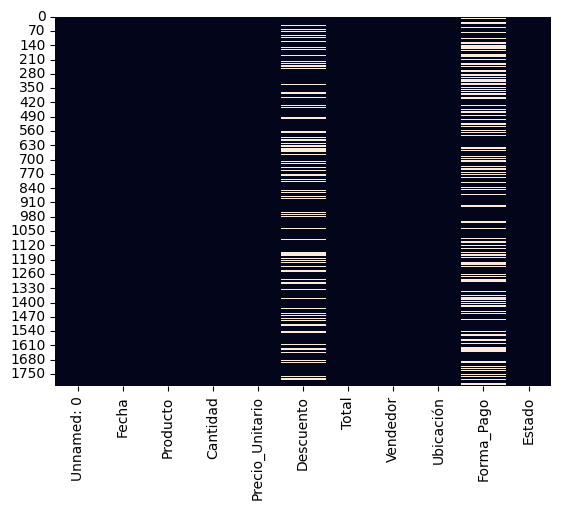

In [ ]:
import seaborn as sns

sns.heatmap(df.isnull(), cbar = False)

<Axes: >

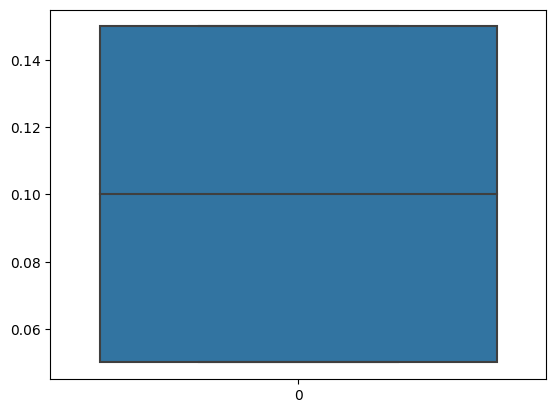

In [ ]:
sns.boxplot(df.Descuento)

In [ ]:
df['Descuento'].fillna(df['Descuento'].mean(), inplace = True)
print("Valores perdidos en descuento: ", str(df['Descuento'].isnull().sum()))

Valores perdidos en descuento:  0


<Axes: >

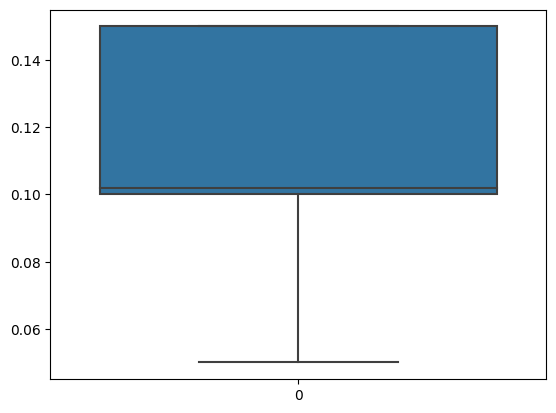

In [ ]:
sns.boxplot(df.Descuento)

In [ ]:
df['Forma_Pago'].mode()
df['Forma_Pago'].fillna(df['Forma_Pago'].mode()[0], inplace = True)
print("Valores perdidos en Forma Pago: ", str(df['Forma_Pago'].isnull().sum()))

Valores perdidos en Forma Pago:  0


In [ ]:
df.isnull().sum()

Unnamed: 0         0
Fecha              0
Producto           0
Cantidad           0
Precio_Unitario    0
Descuento          0
Total              0
Vendedor           0
Ubicación          0
Forma_Pago         0
Estado             0
dtype: int64

In [ ]:
print(df.dtypes)

Unnamed: 0           int64
Fecha               object
Producto            object
Cantidad             int64
Precio_Unitario      int64
Descuento          float64
Total                int64
Vendedor            object
Ubicación           object
Forma_Pago          object
Estado              object
dtype: object


<Axes: >

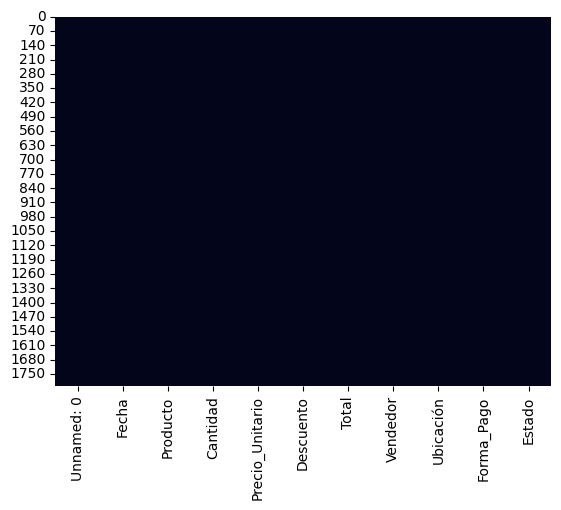

In [ ]:
sns.heatmap(df.isnull(), cbar = False)

In [ ]:
df

,Unnamed: 0,Fecha,Producto,Cantidad,Precio_Unitario,Descuento,Total,Vendedor,Ubicación,Forma_Pago,Estado
0,0,2022-01-01,Tableta,4,114,0.150000,4935,Carlos,En linea,Efectivo,Completo
1,1,2022-01-02,Laptop,3,835,0.101977,3144,Juan,Local,Tarjeta,Cancelado
2,2,2022-01-03,Tableta,4,672,0.150000,1545,Maria,En linea,Tarjeta,Pendiente
3,3,2022-01-04,Tableta,7,221,0.101977,4056,Maria,En linea,Tarjeta,Cancelado
4,4,2022-01-05,Laptop,1,376,0.050000,3181,Carlos,Local,Efectivo,Pendiente
...,...,...,...,...,...,...,...,...,...,...,...
1805,1805,2026-12-11,Telefono,6,878,0.050000,1420,Carlos,En linea,Tarjeta,Completo
1806,1806,2026-12-12,Tableta,1,207,0.100000,1188,Maria,En linea,Tarjeta,Cancelado
1807,1807,2026-12-13,Telefono,2,943,0.050000,4772,Maria,Local,Efectivo,Pendiente
1808,1808,2026-12-14,Telefono,6,701,0.101977,1969,Juan,Local,Tarjeta,Completo


# 1. Análisis de ventas

Calcula el total de ventas para cada producto (suma de la columna ”Total”) y muestra los resultados en orden descendente.

In [ ]:
ventas_por_producto = df.groupby('Producto')['Total'].sum().reset_index()
ventas_por_producto = ventas_por_producto.sort_values(by='Total', ascending=False)
ventas_por_producto

,Producto,Total
0,Laptop,1741064
2,Telefono,1625860
1,Tableta,1576201


Encuentra el producto más vendido y el producto menos vendido.


In [ ]:
productos_vendidos = df.groupby('Producto')['Cantidad'].sum().reset_index()
producto_mas_vendido = productos_vendidos.sort_values(by='Cantidad', ascending=False).iloc[0]
producto_mas_vendido


Producto    Laptop
Cantidad      3135
Name: 0, dtype: object

In [ ]:
producto_menos_vendido = productos_vendidos.sort_values(by='Cantidad', ascending=False).iloc[-1]
producto_menos_vendido

Producto    Tableta
Cantidad       2949
Name: 1, dtype: object

Calcula el promedio de descuento otorgado en las ventas y la cantidad de ventas con descuento.

In [ ]:
ventas_con_descuento = df[df['Descuento'] > 0]
promedio_descuento = ventas_con_descuento['Descuento'].mean()
cantidad_ventas_con_descuento = ventas_con_descuento.shape[0]
print("La cantidad de ventas con descuento es:", cantidad_ventas_con_descuento)
print("El promedio de descuentos otorgados en las ventas es: ", promedio_descuento)

La cantidad de ventas con descuento es: 1810
El promedio de descuentos otorgados en las ventas es:  0.10197657393850659


# 2. Analisis de Ubicaciones y Formas de pago

Agrupa las ventas por ubicación y calcula la cantidad total de ventas y el monto promedio de venta para cada ubicación

In [ ]:
Agrupadas_ubicacion = df.groupby('Ubicación').agg(
    Cantidad_Total_Ventas = ('Cantidad', 'sum'),
    Monto_Promedio_Venta = ('Total', 'mean')
).reset_index()
print(Agrupadas_ubicacion)

  Ubicación  Cantidad_Total_Ventas  Monto_Promedio_Venta
0  En linea                   4390           2736.282110
1     Local                   4652           2726.105544


Agrupa las ventas por forma de pago y calcula la cantidad total de ventas y el monto promedio de venta para cada forma de pago

In [ ]:
Agrupadas_forma_pago = df.groupby('Forma_Pago').agg(
    Cantidad_Total_Ventas = ('Cantidad', 'sum'),
    Monto_Promedio_Venta = ('Total', 'mean')
).reset_index()
print(Agrupadas_forma_pago)

  Forma_Pago  Cantidad_Total_Ventas  Monto_Promedio_Venta
0   Efectivo                   2962           2805.550167
1    Tarjeta                   6080           2694.229373


# 3. Análisis de vendedores

Encuentra el vendedor que realizó la mayor cantidad de ventas y el vendedor que generó el mayor monto total de ventas.

In [ ]:
ventas_por_vendedor = df.groupby('Vendedor')["Cantidad"].sum()
print(ventas_por_vendedor)
max_ventas = ventas_por_vendedor.max()
vendedor_max_ventas = ventas_por_vendedor[ventas_por_vendedor == max_ventas].index[0]
print("El vendedor con mayor cantidad de ventas es:", vendedor_max_ventas)

Vendedor
Carlos    2959
Juan      3101
Maria     2982
Name: Cantidad, dtype: int64
El vendedor con mayor cantidad de ventas es: Juan


In [ ]:
ventas_por_monto = df.groupby('Vendedor')["Total"].sum()
max_monto = ventas_por_monto.max()
vendedor_max_monto = ventas_por_monto[ventas_por_monto == max_monto].index[0]
print(ventas_por_monto)
print()
print()
print("El vendedor que generó el mayor monto total de ventas es: ", vendedor_max_monto)

Vendedor
Carlos    1575248
Juan      1734838
Maria     1633039
Name: Total, dtype: int64


El vendedor que generó el mayor monto total de ventas es:  Juan


Calcule la cantidad promedio de productos vendidos por vendedor

In [ ]:
promedio_productos_por_vendedor = ventas_por_vendedor.mean()

print("Cantidad promedio de productos vendidos por vendedor:", promedio_productos_por_vendedor)

Cantidad promedio de productos vendidos por vendedor: 3014.0


# 4. Analisis Temporal

Agrega una columna llamada "Mes" que contenga el mes correspondiente de cada venta

In [ ]:
df['Fecha'] = pd.to_datetime(df['Fecha'])
df['Mes'] = df['Fecha'].dt.month
df

,Unnamed: 0,Fecha,Producto,Cantidad,Precio_Unitario,Descuento,Total,Vendedor,Ubicación,Forma_Pago,Estado,Mes
0,0,2022-01-01,Tableta,4,114,0.150000,4935,Carlos,En linea,Efectivo,Completo,1
1,1,2022-01-02,Laptop,3,835,0.101977,3144,Juan,Local,Tarjeta,Cancelado,1
2,2,2022-01-03,Tableta,4,672,0.150000,1545,Maria,En linea,Tarjeta,Pendiente,1
3,3,2022-01-04,Tableta,7,221,0.101977,4056,Maria,En linea,Tarjeta,Cancelado,1
4,4,2022-01-05,Laptop,1,376,0.050000,3181,Carlos,Local,Efectivo,Pendiente,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1805,1805,2026-12-11,Telefono,6,878,0.050000,1420,Carlos,En linea,Tarjeta,Completo,12
1806,1806,2026-12-12,Tableta,1,207,0.100000,1188,Maria,En linea,Tarjeta,Cancelado,12
1807,1807,2026-12-13,Telefono,2,943,0.050000,4772,Maria,Local,Efectivo,Pendiente,12
1808,1808,2026-12-14,Telefono,6,701,0.101977,1969,Juan,Local,Tarjeta,Completo,12


Agrupa las ventas por mes y calcula el total de ventas y el monto promedio de venta para cada mes

In [ ]:
Agrupadas_mes = df.groupby('Mes').agg(
    Total_venta = ('Total', 'sum'),
    Monto_Promedio_Venta = ('Total', 'mean')
).reset_index()
print(Agrupadas_mes)

    Mes  Total_venta  Monto_Promedio_Venta
0     1       405962           2619.109677
1     2       365523           2592.361702
2     3       433779           2798.574194
3     4       418074           2787.160000
4     5       423873           2734.664516
5     6       398593           2657.286667
6     7       459810           2966.516129
7     8       428810           2766.516129
8     9       372490           2483.266667
9    10       459160           2962.322581
10   11       412946           2752.973333
11   12       364105           2619.460432


# 5. Tipo de cliente

Utiliza  la  funcion  np.where  de  NumPy  para  crear  una  nueva  columna  llamada  ”Tipo-Cliente”. Esta columna debe contener ”Regular”para ventas con descuento menor o igual a0.1 y ”Especial”para ventas con descuento mayor a 0.1.

In [ ]:
df['Tipo-Cliente'] = np.where(df['Descuento'] <= 0.1, 'Regular', 'Especial')

print(df.head())

   Unnamed: 0      Fecha Producto  Cantidad  Precio_Unitario  Descuento  \
0           0 2022-01-01  Tableta         4              114   0.150000   
1           1 2022-01-02   Laptop         3              835   0.101977   
2           2 2022-01-03  Tableta         4              672   0.150000   
3           3 2022-01-04  Tableta         7              221   0.101977   
4           4 2022-01-05   Laptop         1              376   0.050000   

   Total Vendedor Ubicación Forma_Pago     Estado  Mes Tipo-Cliente  
0   4935   Carlos  En linea   Efectivo   Completo    1     Especial  
1   3144     Juan     Local    Tarjeta  Cancelado    1     Especial  
2   1545    Maria  En linea    Tarjeta  Pendiente    1     Especial  
3   4056    Maria  En linea    Tarjeta  Cancelado    1     Especial  
4   3181   Carlos     Local   Efectivo  Pendiente    1      Regular  


Calcula la cantidad total de ventas de ”Regular”y ”Especial”.

In [ ]:
ventas_por_tipo_cliente = df.groupby('Tipo-Cliente')['Total'].sum()
print("Cantidad total de ventas 'Regular':", ventas_por_tipo_cliente['Regular'])
print("Cantidad total de ventas 'Especial':", ventas_por_tipo_cliente['Especial'])

Cantidad total de ventas 'Regular': 2488714
Cantidad total de ventas 'Especial': 2454411


Calcula el monto promedio de venta para cada tipo de cliente.

In [ ]:
monto_promedio_por_tipo_cliente = df.groupby('Tipo-Cliente')['Total'].mean()

print("Monto promedio de venta para 'Regular':", monto_promedio_por_tipo_cliente['Regular'])
print("Monto promedio de venta para 'Especial':", monto_promedio_por_tipo_cliente['Especial'])

Monto promedio de venta para 'Regular': 2821.671201814059
Monto promedio de venta para 'Especial': 2644.8394396551726


Calcula el porcentaje de ventas ”Especiales”con respecto al total de ventas

In [ ]:
total_ventas = df['Total'].sum()
ventas_especiales = df[df['Tipo-Cliente'] == 'Especial']
total_ventas_especiales = ventas_especiales['Total'].sum()
porcentaje_ventas_especiales = (total_ventas_especiales / total_ventas) * 100

print("Porcentaje de ventas 'Especiales' con respecto al total de ventas:", porcentaje_ventas_especiales, "%")

Porcentaje de ventas 'Especiales' con respecto al total de ventas: 49.653023138196986 %


# 6. Resultados

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## Resultados Análisis de ventas

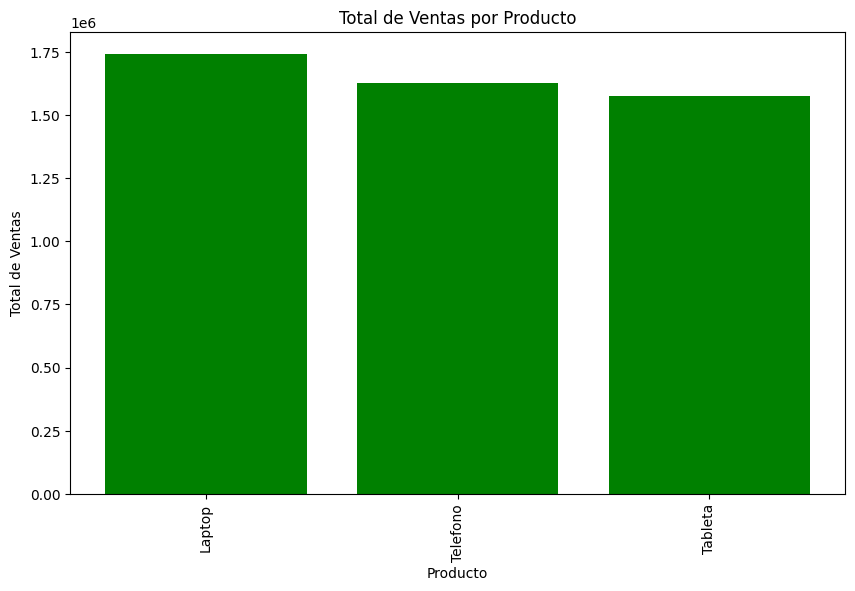

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(ventas_por_producto['Producto'], ventas_por_producto['Total'], color='green')
plt.xlabel('Producto')
plt.ylabel('Total de Ventas')
plt.title('Total de Ventas por Producto')
plt.xticks(rotation=90)
plt.show()

## Resultados Análisis de Ubicaciones y formas de pago

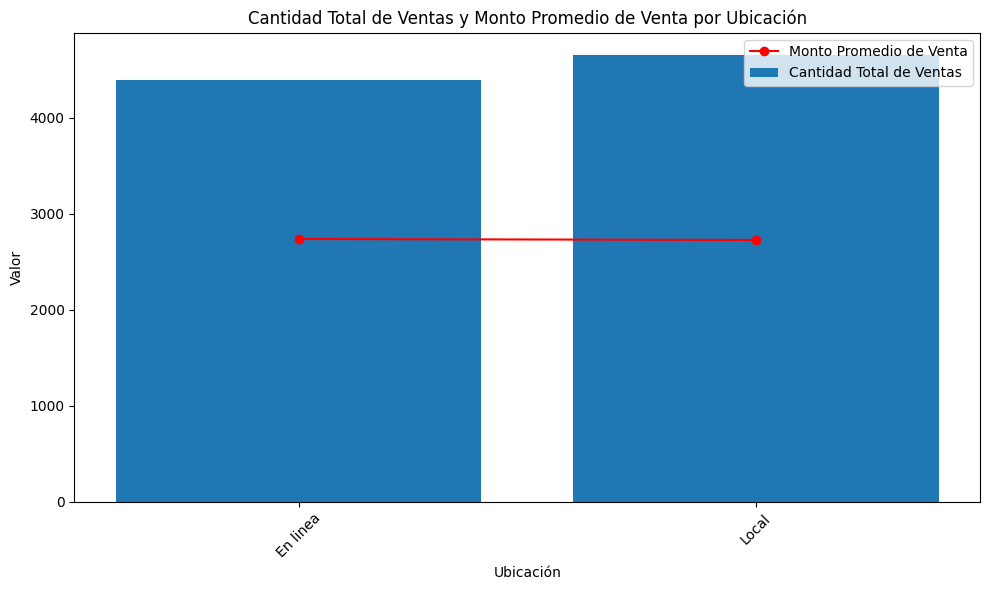

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(Agrupadas_ubicacion['Ubicación'], Agrupadas_ubicacion['Cantidad_Total_Ventas'], label='Cantidad Total de Ventas')
plt.plot(Agrupadas_ubicacion['Ubicación'], Agrupadas_ubicacion['Monto_Promedio_Venta'], color='red', marker='o', label='Monto Promedio de Venta')
plt.xlabel('Ubicación')
plt.ylabel('Valor')
plt.title('Cantidad Total de Ventas y Monto Promedio de Venta por Ubicación')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

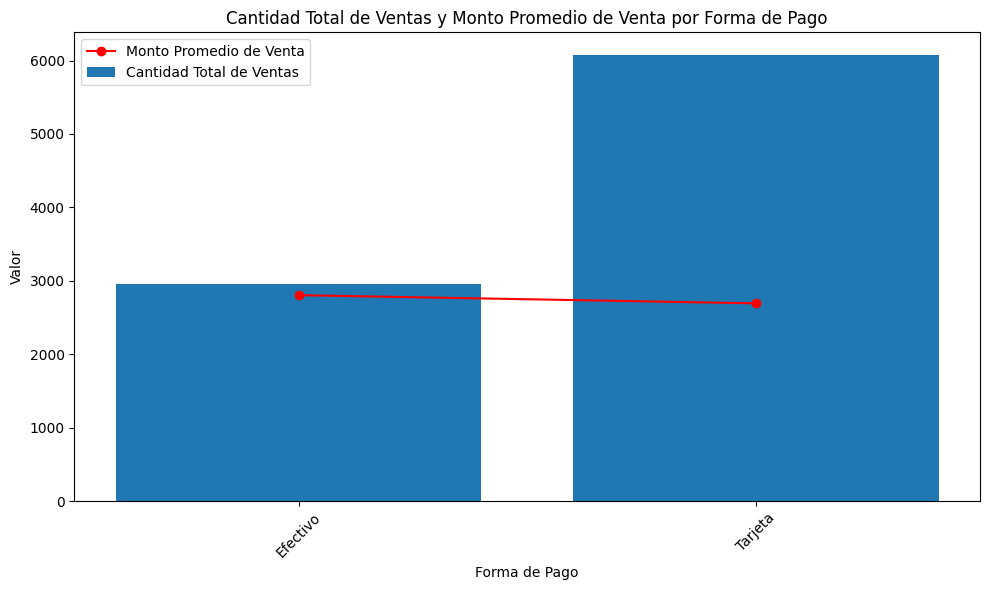

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(Agrupadas_forma_pago['Forma_Pago'], Agrupadas_forma_pago['Cantidad_Total_Ventas'], label='Cantidad Total de Ventas')
plt.plot(Agrupadas_forma_pago['Forma_Pago'], Agrupadas_forma_pago['Monto_Promedio_Venta'], color='red', marker='o', label='Monto Promedio de Venta')
plt.xlabel('Forma de Pago')
plt.ylabel('Valor')
plt.title('Cantidad Total de Ventas y Monto Promedio de Venta por Forma de Pago')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

## Resultados Análisis de vendedores

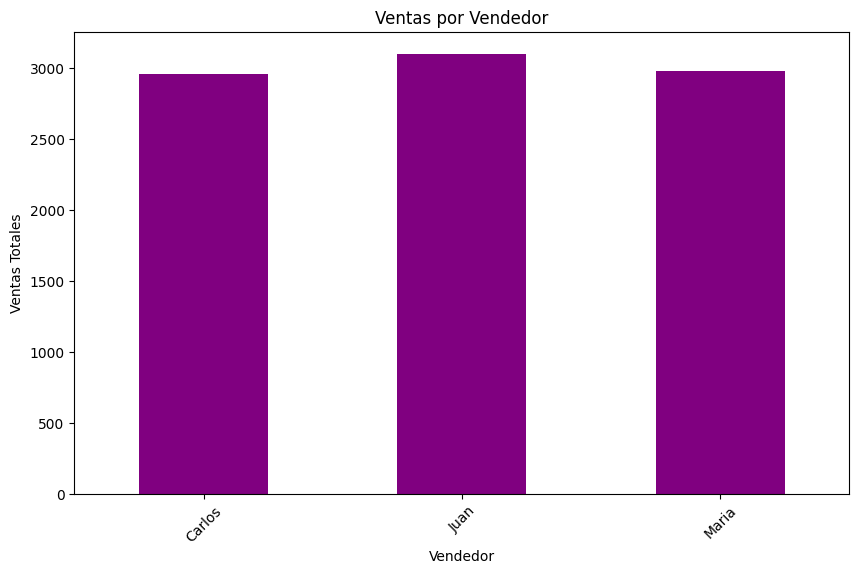

In [ ]:
plt.figure(figsize=(10, 6))
ventas_por_vendedor.plot(kind='bar', color='purple')
plt.xlabel('Vendedor')
plt.ylabel('Ventas Totales')
plt.title('Ventas por Vendedor')
plt.xticks(rotation=45)
plt.show()

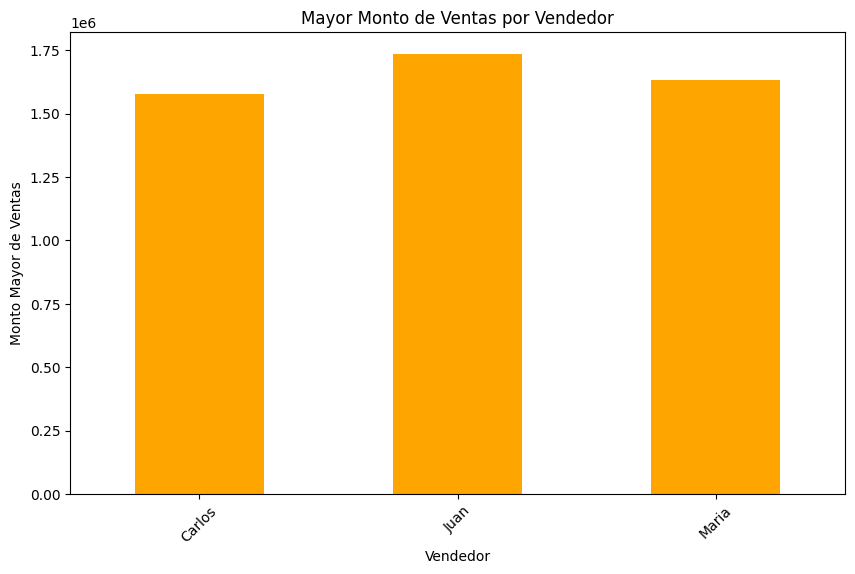

In [ ]:
plt.figure(figsize=(10, 6))
ventas_por_monto.plot(kind='bar', color='orange')
plt.xlabel('Vendedor')
plt.ylabel('Monto Mayor de Ventas')
plt.title('Mayor Monto de Ventas por Vendedor')
plt.xticks(rotation=45)
plt.show()

## Resultado Análisis temporal

<Figure size 1000x600 with 0 Axes>

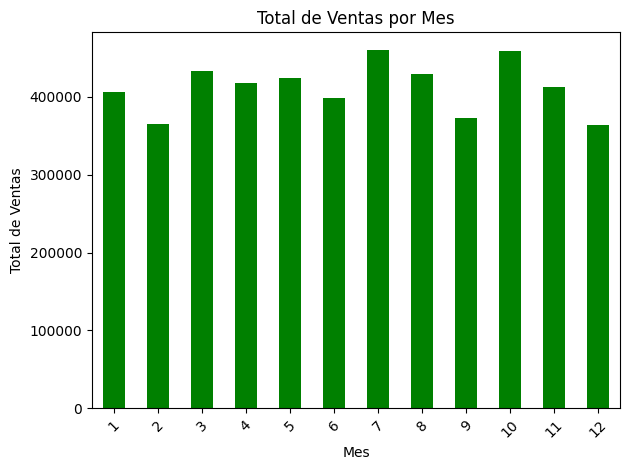

In [ ]:
plt.figure(figsize=(10, 6))
Agrupadas_mes.plot(x='Mes', y='Total_venta', kind='bar', color='green', legend=None)
plt.xlabel('Mes')
plt.ylabel('Total de Ventas')
plt.title('Total de Ventas por Mes')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

## Resultados Tipo de cliente

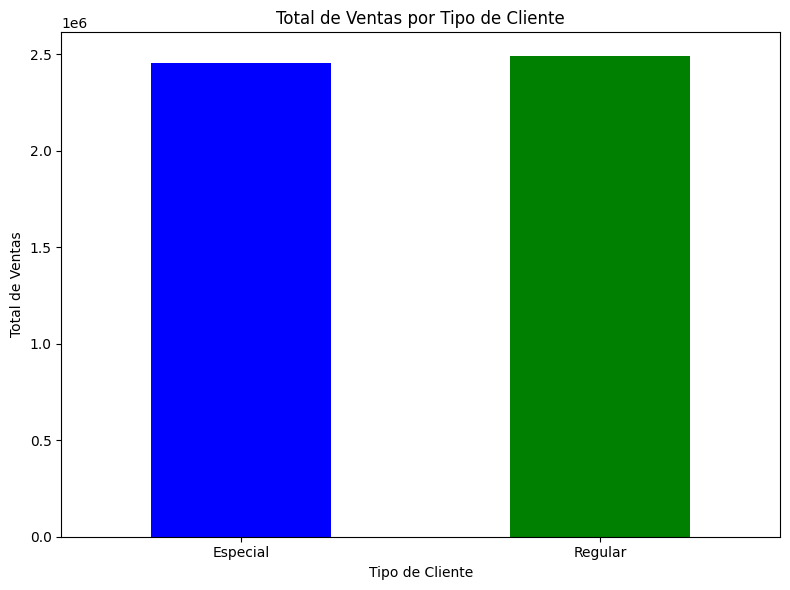

In [ ]:
plt.figure(figsize=(8, 6))
ventas_por_tipo_cliente.plot(kind='bar', color=['blue', 'green'])
plt.xlabel('Tipo de Cliente')
plt.ylabel('Total de Ventas')
plt.title('Total de Ventas por Tipo de Cliente')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

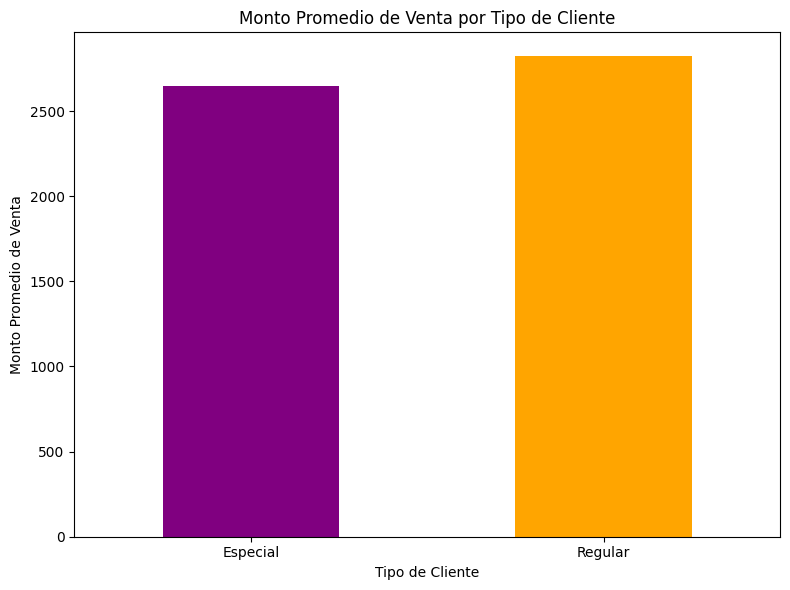

In [ ]:
plt.figure(figsize=(8, 6))
monto_promedio_por_tipo_cliente.plot(kind='bar', color=['purple', 'orange'])
plt.xlabel('Tipo de Cliente')
plt.ylabel('Monto Promedio de Venta')
plt.title('Monto Promedio de Venta por Tipo de Cliente')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

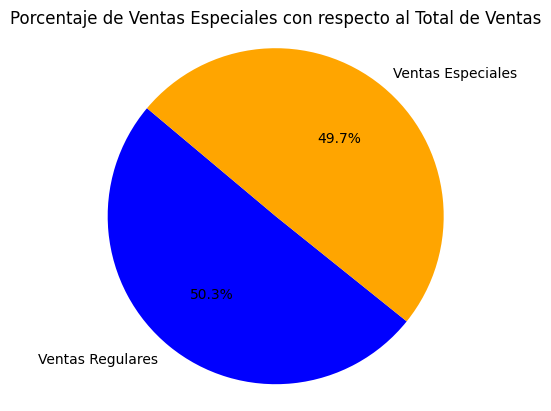

In [ ]:
labels = ['Ventas Regulares', 'Ventas Especiales']
sizes = [100 - porcentaje_ventas_especiales, porcentaje_ventas_especiales]
colors = ['blue', 'orange']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Porcentaje de Ventas Especiales con respecto al Total de Ventas')
plt.axis('equal')

plt.show()